<a href="https://colab.research.google.com/github/jamesbrowne98/jamesbrowne98/blob/main/CW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import io
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("ENB2012_data.xlsx")
print(data)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


inputs = data.values[:,:8].astype(float)
targets = data.values[:,8:].astype(float)
print(np.shape(inputs))

#Normalize the inputs
scaler = MinMaxScaler()
scaled_inputs = scaler.fit_transform(inputs)
scaled_targets = scaler.fit_transform(targets)

print(scaled_inputs)
print(scaled_targets)



(768, 8)
[[1.         0.         0.28571429 ... 0.         0.         0.        ]
 [1.         0.         0.28571429 ... 0.33333333 0.         0.        ]
 [1.         0.         0.28571429 ... 0.66666667 0.         0.        ]
 ...
 [0.         1.         0.71428571 ... 0.33333333 1.         1.        ]
 [0.         1.         0.71428571 ... 0.66666667 1.         1.        ]
 [0.         1.         0.71428571 ... 1.         1.         1.        ]]
[[0.25721219 0.28090493]
 [0.25721219 0.28090493]
 [0.25721219 0.28090493]
 ...
 [0.28120787 0.1672502 ]
 [0.28228633 0.153784  ]
 [0.28660016 0.13816321]]


Random Forest Regressor

In [4]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(scaled_inputs, scaled_targets)
outputs = regressor.predict(scaled_inputs)
print("Random Forest Regressor: \n", outputs)

Random Forest Regressor: 
 [[0.26504718 0.29160786]
 [0.26640334 0.28817129]
 [0.26540847 0.28960409]
 ...
 [0.28255594 0.1643819 ]
 [0.28509571 0.15198222]
 [0.28661903 0.14437921]]


Neural Network Regressor

In [5]:
from sklearn.neural_network import MLPRegressor
regressor_NN = MLPRegressor(max_iter=5000)
regressor_NN.fit(scaled_inputs, scaled_targets)
outputs = regressor_NN.predict(scaled_inputs)
print("MLP Regressor: \n", outputs)


MLP Regressor: 
 [[0.46578986 0.46200936]
 [0.46656736 0.4499786 ]
 [0.46272677 0.43425266]
 ...
 [0.38525392 0.2494829 ]
 [0.37926741 0.25396943]
 [0.38858495 0.25855823]]


Support Vector Machine Regressor


In [6]:
#first the Y's must be split and normalized
from sklearn.svm import SVR
targetY1 = data["Y1"]
targetY2 = data["Y2"]
x = data.iloc[:,0:8].values
y = data.iloc[:,8:10].values

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [8]:
Y1 = y[:,:1]
Y2 = y[:,1:]

In [9]:
Y1_reg = SVR()
Y1_reg.fit(x, Y1.reshape(-1))
predY1 = Y1_reg.predict(x)
print(predY1)

[0.35504785 0.35751805 0.34678964 0.33296785 0.36429904 0.36669783
 0.35395753 0.33960422 0.32054237 0.32290067 0.30875848 0.29261367
 0.40806651 0.42168256 0.41235271 0.39295674 0.51421049 0.54080088
 0.53698344 0.51302093 0.57002719 0.58332993 0.58614496 0.58343891
 0.10205707 0.06996078 0.06919454 0.10120301 0.09673619 0.0652879
 0.06496452 0.09701465 0.10567137 0.07615456 0.07597874 0.10628157
 0.12352517 0.09616953 0.09584518 0.12362224 0.145869   0.12045472
 0.11968227 0.1446808  0.17011947 0.14612533 0.14474247 0.16721685
 0.51860932 0.54542511 0.53249166 0.49283359 0.52076132 0.54068811
 0.52673489 0.49509454 0.44674132 0.46332163 0.44874585 0.41950487
 0.54991281 0.57570794 0.56642783 0.53670808 0.68085293 0.7196459
 0.71580074 0.68135483 0.7475017  0.76837258 0.76828911 0.75566425
 0.10515089 0.07470143 0.07579474 0.10907555 0.10382775 0.07516456
 0.07774014 0.11146189 0.11858449 0.09336956 0.09705277 0.1289372
 0.14154095 0.12000203 0.12439522 0.15351462 0.16751226 0.1490615

In [10]:
Y2_reg = SVR()
Y2_reg.fit(x, Y2.reshape(-1))
predY2 = Y2_reg.predict(x)
print(predY2)

[0.35243481 0.28914837 0.2945659  0.38102942 0.38910154 0.31049946
 0.32205353 0.43901694 0.3467632  0.26032068 0.27397492 0.40360098
 0.44726569 0.36518082 0.37612079 0.49848046 0.56333468 0.49370233
 0.49925756 0.60065891 0.6044388  0.55454486 0.54528042 0.598642
 0.10017559 0.06281587 0.06424896 0.10748873 0.09715127 0.06221354
 0.06344645 0.10385873 0.10359813 0.07261841 0.07344483 0.10902973
 0.1127574  0.08661358 0.08679392 0.11604187 0.12264682 0.10049145
 0.10000018 0.12370886 0.13172323 0.1124705  0.11135098 0.1306457
 0.46234345 0.40664224 0.40662813 0.4830754  0.4984393  0.41961248
 0.42104791 0.53084234 0.43853391 0.34532983 0.34442468 0.46713391
 0.55247755 0.46314362 0.45901239 0.57456237 0.68813135 0.61468659
 0.60678822 0.70023364 0.70483893 0.65954081 0.64937331 0.70338965
 0.10861127 0.06858355 0.067047   0.10980804 0.11071573 0.073916
 0.07220716 0.11134862 0.12332484 0.09185896 0.09003404 0.12333246
 0.1369857  0.11195024 0.11009725 0.13622585 0.14901653 0.12929489


Part 1.3

In [11]:
from numpy.lib.shape_base import split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from numpy.ma.core import reshape
from sklearn.base import ClassifierMixin
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [12]:
x_train, xtest, ytrain, ytest = train_test_split(scaled_inputs, scaled_targets, test_size=0.2)

In [13]:
from sklearn.model_selection import cross_val_score
#SVM needs to be done in two parts as it cannot fit both Y's
#Y1 training 
regressor_svm = SVR()
regressor_svm.fit(x_train, ytrain[:,0])
output_svm = regressor_svm.predict(xtest)
cross_val_scoreY1 = cross_val_score(regressor_svm, x_train, ytrain[:,0], scoring ="neg_mean_squared_error")*-1
mse_SVM = (mean_squared_error(ytest[:,0], output_svm))

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
#Y1 testing
regressor_svm_ts = SVR()
regressor_svm_ts.fit(xtest, ytest[:,0])
output_svm = regressor_svm_ts.predict(xtest)
cross_val_score = cross_val_score(regressor_svm_ts, xtest, ytest[:,0], scoring ="neg_mean_squared_error")*-1
mse_SVM_ts = (mean_squared_error(ytest[:,0], output_svm))

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
#Y2 training 
regressor_svm1 = SVR()
regressor_svm1.fit(x_train, ytrain[:,1])
output_svm1 = regressor_svm1.predict(xtest)
cross_val_scoreY2 = cross_val_score(regressor_svm1, x_train, ytrain[:,0], scoring ="neg_mean_squared_error")*-1
mse_SVM1 = mean_squared_error(ytest[:,1], output_svm1)

In [18]:
from sklearn.model_selection import cross_val_score

In [19]:
#Y2 Testing 
regressor_svm1_ts = SVR()
regressor_svm1_ts.fit(xtest, ytest[:,1])
output_svm1 = regressor_svm1_ts.predict(xtest)
cross_val_scoreY2 = cross_val_score(regressor_svm1_ts, xtest, ytest[:,0], scoring ="neg_mean_squared_error")*-1
mse_SVM1_ts = mean_squared_error(ytest[:,1], output_svm1)

In [20]:
#Random Forest Regressor
regressor_RF = RandomForestRegressor()
#Training
regressor_RF.fit(x_train, ytrain)
#testing
outputs_RF = regressor_RF.predict(xtest)
#training print
mse_regressor_tr = (mean_squared_error(ytest, outputs_RF))
#testing print
mse_regressor = regressor_RF.score(xtest, ytest)

In [21]:
from sklearn.model_selection import cross_val_score
Random_Forest_training = cross_val_score(regressor_RF, x_train, ytrain, scoring="neg_mean_squared_error")*-1
print(Random_Forest_training)

[0.00096777 0.00174503 0.00166053 0.00197825 0.00152179]


In [22]:
#MLP Regressor
regressor_NN = MLPRegressor()
#Training
regressor_NN.fit(x_train, ytrain)
#testing
outputs_NN = regressor_RF.predict(xtest)
#training print
mse_regressor_NN_tr = (mean_squared_error(ytest, outputs_NN))
#testing print
mse_regressor_NN = regressor_RF.score(xtest, ytest)

In [23]:
from sklearn.model_selection import cross_val_score
NN_training = cross_val_score(regressor_NN, x_train, ytrain, scoring="neg_mean_squared_error")*-1
print(NN_training)

[0.00655635 0.00684008 0.00837772 0.00802097 0.00782587]


In [24]:
print(f"Training MSE of Support Vector Y1 is {mse_SVM}")
print(f"Testing MSE of Support Vector Y1 is {mse_SVM_ts}")
print()

print(f"Training MSE of Support Vector Y2 is {mse_SVM1}")
print(f"Testing MSE of Support Vector Y2 is {mse_SVM1_ts}")
print()

Training MSE of Support Vector Y1 is 0.005030041098697078
Testing MSE of Support Vector Y1 is 0.005768536161732832

Training MSE of Support Vector Y2 is 0.006779752713080057
Testing MSE of Support Vector Y2 is 0.006237976787091717



<function matplotlib.pyplot.show>

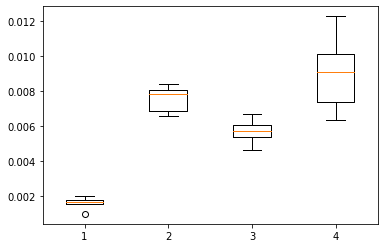

In [25]:
import matplotlib.pyplot as plt
mse_regressor
plt.boxplot([Random_Forest_training,NN_training, cross_val_scoreY1, cross_val_scoreY2])
plt.show

Part 2 


In [26]:
#---------------------------------
#--------INITILISE DATA-----------
#---------------------------------

import numpy as np
import pandas as pd
global Newtable
global ProblemTable

# Creating a 2d array of modlues and labs
Modules = []
Labs = []
Lecturers = []
D = 0
Violations = 0

# Lab sessions for both colounms
LabSessions1 =[]
LabSessions2 =[]

# Table Initilisation
timetable = np.empty(shape=[20, 3])


initialise = {
    "name" : [None] * 20,
    "Lab 1" : [None] * 20,
    "Lab 2" : [None] * 20,
}

ProblemTable = pd.DataFrame(initialise)
ProblemTable


,name,Lab 1,Lab 2
0,None,None,None
1,None,None,None
2,None,None,None
3,None,None,None
4,None,None,None
5,None,None,None
6,None,None,None
7,None,None,None
8,None,None,None
9,None,None,None


In [27]:
class module:
  def __init__(self, name, labs, lecturer, constraints):
    self.name = name
    self.labs = labs
    self.lecturer = lecturer
    self.constraints = constraints

In [28]:
# Splits data modules
global newmod
with open('timetable.txt') as Data:
    for i in Data:
      row = i.split('|')
      newmod = module(str(row[0]), str(row[2]), str(row[1]), str(row[3]))
      Modules.append(newmod)

In [29]:
# Add 3 empty slots to Module array so total is equal to 20
newmod = module("Empty ", "0", "0", "0")
for i in range (3):
  Modules.append(newmod)

In [30]:
# Generate Labs
for i in Modules:
  for o in range (int(i.labs)):
    Labs.append(i.name) #+ " Lab: " + str(o + 1))

# Add Empty slots to labs so they total 40
for i in range (9):
  Labs.append("Empty ")

In [31]:
# Split Labs into 2 equaly sides arrays for implementation in table
def SplitLabs():
  for i in range (20):
    LabSessions1.append(Labs[i])

  for i in range (20):
    LabSessions2.append(Labs[i + 20])
"""
Code not needed as lecturer constraints are already counted for in constraints
# Lecturers Array
for i in Modules:
  Lecturers.append(i.lecturer)
"""

'\nCode not needed as lecturer constraints are already counted for in constraints\n# Lecturers Array\nfor i in Modules:\n  Lecturers.append(i.lecturer)\n'

In [32]:
# Shuffle Arrays
def Scramble(ProblemTable):
  Newtable= ProblemTable.sample(frac=1)
  """
  print("------Starting Table--------")
  print(Newtable)
  print("----------------------------")
  """
  return Newtable
ProblemTable


#---------------------------------
#---------------------------------

,name,Lab 1,Lab 2
0,None,None,None
1,None,None,None
2,None,None,None
3,None,None,None
4,None,None,None
5,None,None,None
6,None,None,None
7,None,None,None
8,None,None,None
9,None,None,None


In [33]:
# Splits data modules
with open('timetable.txt') as Data:
    for i in Data:
      row = i.split('|')
      newmod = module(str(row[0]), str(row[2]), str(row[1]), str(row[3]))
      Modules.append(newmod)

In [34]:
# Generate Labs
for i in Modules:
  for o in range (int(i.labs)):
    Labs.append(i.name) #+ " Lab: " + str(o + 1))

In [35]:
# Add Empty slots to labs so they total 40
for i in range (9):
  Labs.append("Empty ") 

In [36]:
# Split Labs into 2 equaly sides arrays for implementation in table
def SplitLabs():
  for i in range (20):
    LabSessions1.append(Labs[i])

  for i in range (20):
    LabSessions2.append(Labs[i + 20])
"""
Code not needed as lecturer constraints are already counted for in constraints
# Lecturers Array
for i in Modules:
  Lecturers.append(i.lecturer)
"""

'\nCode not needed as lecturer constraints are already counted for in constraints\n# Lecturers Array\nfor i in Modules:\n  Lecturers.append(i.lecturer)\n'

In [37]:
# Shuffle Arrays
def ScrambleTable(ProblemTable):
  Newtable= ProblemTable.sample(frac=1)
  """
  print("-----Starting Table-------")
  print(Newtable)
  print("----------------------------")
  """
  return Newtable

#---------------------------------
#---------------------------------

In [41]:
#Populate Table
global violation
def CalculateTable(ProblemTable, Newtable):
  SetModules = []
  Lab1 = []
  Lab2 = []
  
  for i in range(len(Newtable)):
    SetModules.append(Newtable[i][0])
    Lab1.append(Newtable[i][1])
    Lab2.append(Newtable[i][2])
    
    SetModules
    #Search for module Constraints

    for i in range(len(Newtable)):
      SetModules.append(Newtable[i][0])
      Lab1.append(Newtable[i][1])
      Lab2.append(Newtable[i][2])
      print(SetModules)

      ConcurrentViolations = 0
      PrecedenceViolation = 0
      #Concurrent violation Algorithm
      #LecturerConcurrentViolations = 0
      for idx, x in enumerate(SetModules):
          if Lab1[idx] == Lab2[idx]:
            ConcurrentViolations +=1
            for o in Modules:
              if x == o.name:
               #print(x + " C:" + o.constraints)
                #Constaints array to compare
                row = o.constraints.split(',')
                #Concurrent Constraints
                for y in row:
                  if y == Lab1[idx]:
                    ConcurrentViolations +=1
                    if y == Lab2[idx]:
                      ConcurrentViolations +=1
                      if ConcurrentViolations == 0 and PrecedenceViolation == 0:
                        return 0
                      if ConcurrentViolations == 0:
                        ConcurrentViolations = 1
                      if PrecedenceViolation == 0:
                        PrecedenceViolation = 1
                      return PrecedenceViolation * ConcurrentViolations

In [39]:
#hillclimber
def getBestNeighbour(ProblemTable, Newtable):
    Newtable = bestRouteLength = CalculateTable(ProblemTable, Newtable[0])
    bestNeighbour = Newtable[0]
    for Newtable in Newtable:
        currentRouteLength = CalculateTable(ProblemTable, Newtable)
        if currentRouteLength < bestRouteLength:
            bestRouteLength = currentRouteLength
            bestNeighbour = Newtable
    return bestNeighbour, bestRouteLength
    getBestNeighbour(ProblemTable,Newtable)
    print(Newtable, str(bestRouteLength))
    def hillClimbing(ProblemTable):
      currentSolution = ScrambleTable(ProblemTable)
      currentRouteLength = CalculateTable(ProblemTable, currentSolution)
      neighbours = getNeighbours(currentSolution)
      bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(ProblemTable, Newtable)
      while bestNeighbourRouteLength < currentRouteLength:
        currentSolution = bestNeighbour
        currentRouteLength = bestNeighbourRouteLength
        neighbours = getNeighbours(currentSolution)
        bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(ProblemTable, Newtable)
        return currentSolution, currentRouteLength